In [2]:
import pandas as pd 

#Nettoyage de la donnée

data = pd.read_csv('../data/operations.csv')

display(data.dtypes)

data['date_operation'] = pd.to_datetime(data['date_operation'])

display(data.isnull().sum())

# pour afficher uniquement les variables qui ont des valeurs manquantes
nb_na = data.isnull().sum()
display(nb_na[nb_na>0])

display(data.loc[data['montant'].isnull(),:])

# on stocke le df des valeurs manquantes dans un nouveau df
data_na = data.loc[data['montant'].isnull(),:]

# pour chaque ligne de mon df, on récupère les index (qui ne changent pas au travers du .loc)
for index in data_na.index:
    # calcul du montant à partir des soldes précédents et actuels
    data.loc[index, 'montant'] = data.loc[index+1, 'solde_avt_ope'] - data.loc[index, 'solde_avt_ope']
    
#affichage de la structure de ma donnée
display(data.describe())

i = data.loc[data['montant']==-15000,:].index[0] # récupération de l'index de la transaction à -15000

display(data.iloc[i-1:i+2,:]) # on regarde la transaction précédente et la suivante

data.loc[data['montant']==-15000, 'montant'] = -14.39

date_operation     object
libelle            object
montant           float64
solde_avt_ope     float64
categ              object
dtype: object

date_operation    0
libelle           0
montant           2
solde_avt_ope     0
categ             1
dtype: int64

montant    2
categ      1
dtype: int64

,date_operation,libelle,montant,solde_avt_ope,categ
107,2023-06-12,CARTE XX XX LES ANCIENS ROBINSON XX,NaN,4667.19,COURSES
269,2023-09-11,CARTE XX XX XX XX,NaN,3401.93,AUTRE


,montant,solde_avt_ope
count,309.000000,309.000000
mean,-45.739579,3396.117799
std,871.400360,666.180280
min,-15000.000000,1416.810000
25%,-20.590000,3010.760000
50%,-9.600000,3453.960000
75%,-2.720000,3783.860000
max,1071.600000,4709.310000


,date_operation,libelle,montant,solde_avt_ope,categ
198,2023-08-03,VIREMENT XX XX XX XX XX XX XX XX XX XX XX XX,676.00,3121.35,AUTRE
199,2023-08-03,CARTE XX XX XX XX,-15000.00,3797.35,AUTRE
200,2023-08-03,CARTE XX XX L'EPICERIE DEMBAS XX XX,-10.51,3782.96,AUTRE


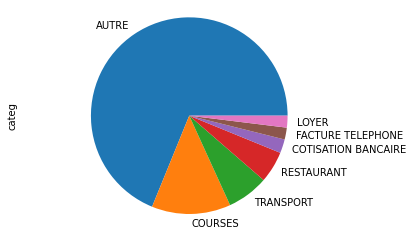

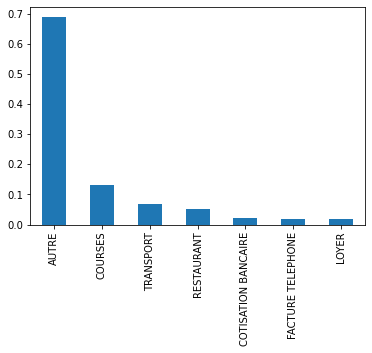

In [3]:
#Représentez la distribution empirique d'une variable

import matplotlib.pyplot as plt

# Diagramme en secteurs
data["categ"].value_counts(normalize=True).plot(kind='pie')
# Cette ligne assure que le pie chart est un cercle plutôt qu'une éllipse
plt.axis('equal') 
plt.show() # Affiche le graphique

# Diagramme en tuyaux d'orgues
data["categ"].value_counts(normalize=True).plot(kind='bar')

plt.show()

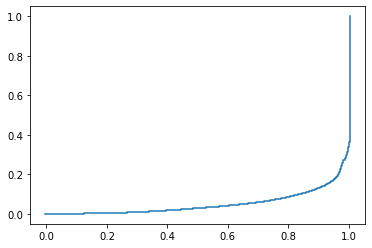

In [6]:
#La courbe de Lorenz
import numpy as np

depenses = data[data['montant'] < 0]

dep = -depenses['montant'].values

n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [7]:
#l'indice de gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.8939852259967689